In [1]:
import pandas as pd 
import os

In [2]:
files_in_dir = os.listdir('results_maxcut_10/optimal')
files_in_dir = [file for file in files_in_dir if file.endswith('.csv')]
files_in_dir[:5]

['results_optimal_1_100.csv',
 'results_optimal_25_100.csv',
 'results_optimal_8_100.csv',
 'results_optimal_13_100.csv',
 'results_optimal_9_100.csv']

In [3]:
max_layers = 30
repetition = 100
dfs = []
for layer in range(1, max_layers+1):
    file_name = f'results_optimal_{layer}_{repetition}.csv'
    if file_name in files_in_dir:
        df = pd.read_csv(f'results_maxcut_10/optimal/{file_name}')
        dfs.append(df)

In [4]:
dfs[0].head()

,Unnamed: 0,problem,layers,optimizer,solutions,parameters,time
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 0, 1, 1, 0, 1, 1, 0, 0], -67.0), ([0,...","[array([3.54902178, 2.71769821]), array([5.889...","[4.281780004501343, 3.3675589561462402, 4.1578..."


In [5]:
import QAOA_Tester as qtee

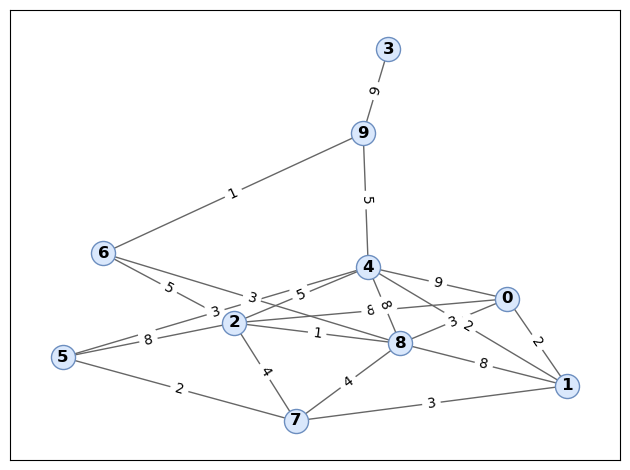

[0, 1, 1, 1, 1, 0, 0, 0, 0, 0]


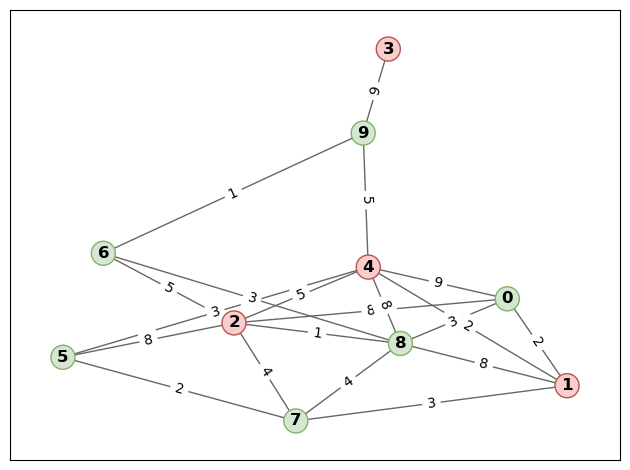

In [6]:
problem_description = eval(dfs[0]['problem'][0])
problem_description
problem = qtee.ProblemGenerator.from_dict(problem_description)
problem.visualize_problem()
problem.visualize_solution()

In [7]:
best_solution = problem.solution
best_solution

([0, 1, 1, 1, 1, 0, 0, 0, 0, 0], 73.0)

In [8]:
solution_30 = eval(dfs[29]['solutions'][0])
sum_of_scores = 0
for solution in solution_30:
    sum_of_scores += solution[1]
    # print(solution[1])
print(sum_of_scores)
print(-sum_of_scores/100)

-4557.0
45.57


In [9]:
avg_scores = pd.DataFrame(columns=['layer', 'score'])
for df in dfs:
    scores = eval(df['solutions'][0])
    avg_score = sum([-score[1] for score in scores])/len(scores)
    layer = int(df['layers'][0])
    avg_scores.loc[len(avg_scores)] = [layer, avg_score]

(0.0, 83.0)

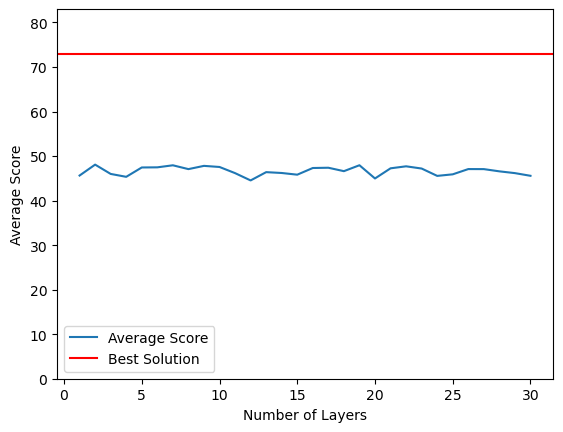

In [10]:
avg_scores.plot(x='layer', y='score')
# add a red line for the best solution
import matplotlib.pyplot as plt
plt.axhline(y=best_solution[1], color='r', linestyle='-')
# the red line should start at x=0 and end at x=max_layers
plt.xlabel('Number of Layers')
plt.ylabel('Average Score')
plt.legend(['Average Score', 'Best Solution'])
# the y axis has to include 0 to max score
plt.ylim(0, best_solution[1]+10)

(0.0, 110.0)

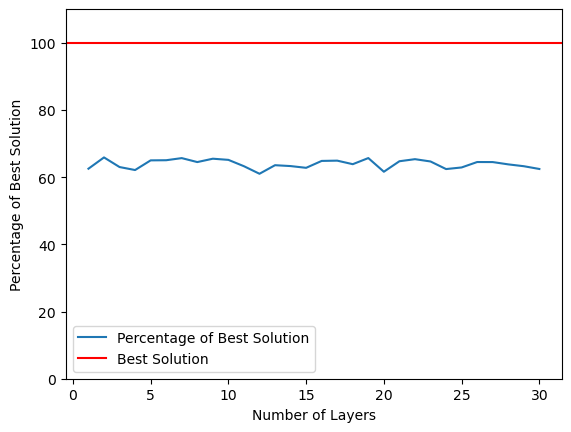

In [12]:
# lets assume the maximum score to be 100% and calculate the percentage of the average score
avg_scores['percentage'] = avg_scores['score']/best_solution[1]*100
avg_scores.plot(x='layer', y='percentage')
plt.axhline(y=100, color='r', linestyle='-')
plt.xlabel('Number of Layers')
plt.ylabel('Percentage of Best Solution')
plt.legend(['Percentage of Best Solution', 'Best Solution'])
plt.ylim(0, 110)